In [107]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
from datetime import datetime

In [108]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [109]:
file_path = "./ref/행정구역_시군구_별__성별_인구수.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # uft-8
ori.columns = ["category","date","people"]
ori.tail()

,category,date,people
182,제주특별자치도,2020,674635
183,제주특별자치도,2021,676759
184,제주특별자치도,2022,678159
185,제주특별자치도,2023,675252
186,제주특별자치도,2024,670368


In [110]:
ori

,category,date,people
0,서울특별시,2014,10103233
1,서울특별시,2015,10022181
2,서울특별시,2016,9930616
3,서울특별시,2017,9857426
4,서울특별시,2018,9765623
...,...,...,...
182,제주특별자치도,2020,674635
183,제주특별자치도,2021,676759
184,제주특별자치도,2022,678159
185,제주특별자치도,2023,675252


In [111]:
ori_data = ori.copy()
ori_data = ori.groupby('category')['people'].sum().reset_index(name="people")
ori_data = ori_data.sort_values('people',ascending=False)
# ori_data = ori_data.rename(columns={'사고유형구분':'type'}) #, '사고건수':'count'})
ori_data

,category,people
1,경기도,144695332
8,서울특별시,106732343
7,부산광역시,37477752
2,경상남도,36620205
11,인천광역시,32508639
3,경상북도,29090622
5,대구광역시,26746719
15,충청남도,23233426
12,전라남도,20461914
13,전북특별자치도,19970431


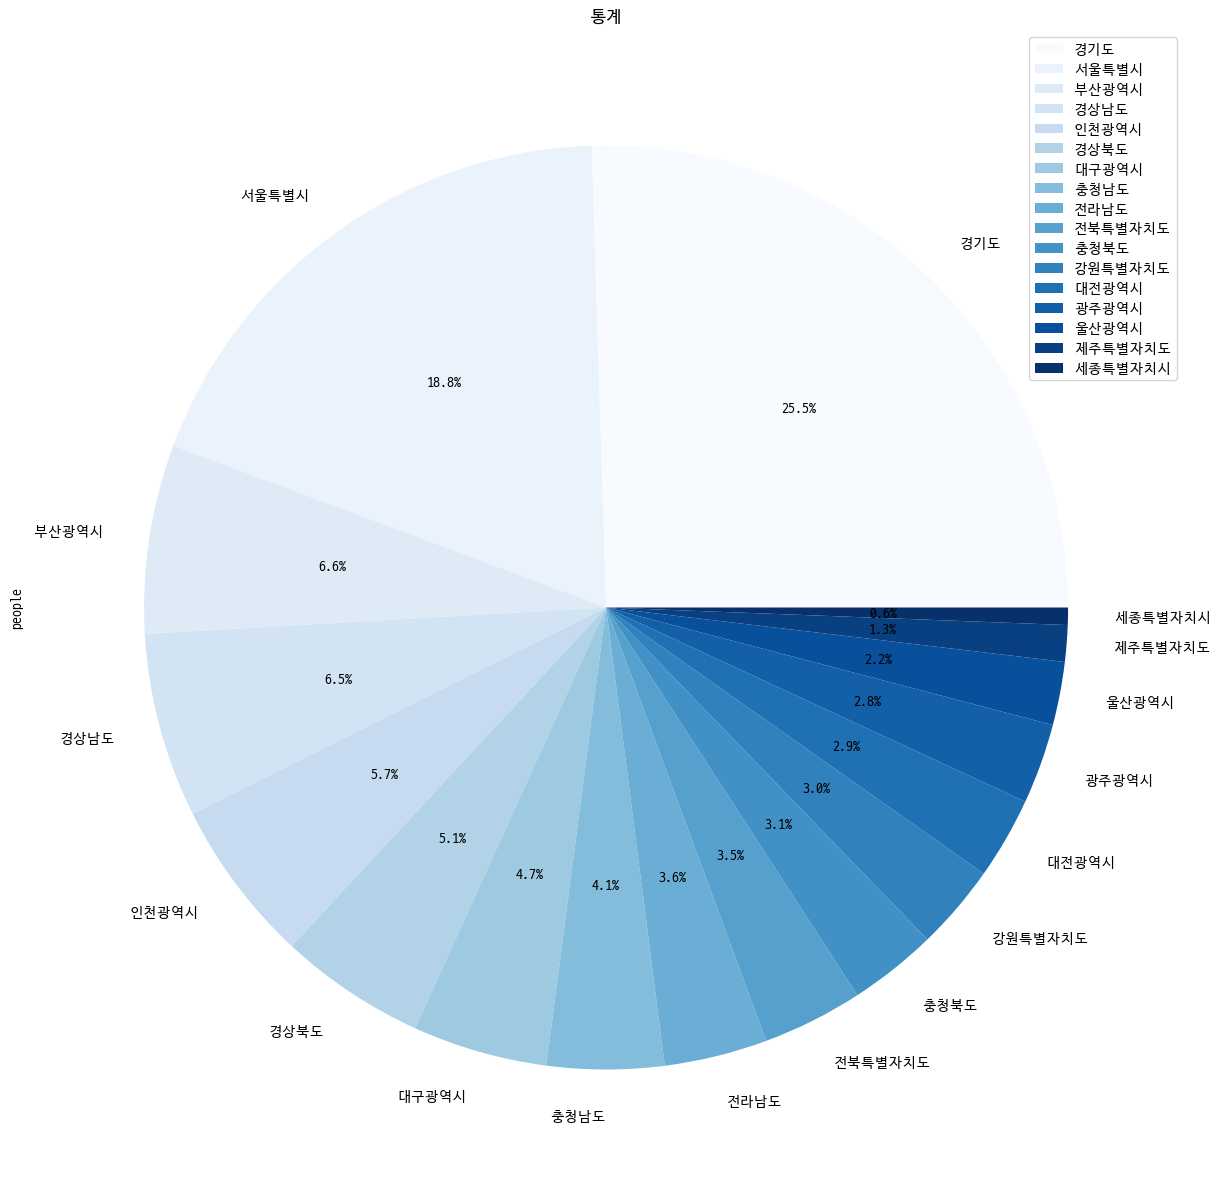

In [112]:
ori_data.plot(
    kind = 'pie',
    y='people',
    labels = ori_data['category'] ,
    figsize=(15,15),
    startangle=0 ,
    autopct='%2.1f%%',
    title="통계",
    cmap = matplotlib.cm.Blues
)

plt. show()

In [113]:
ex_data = ori.copy()
ex_data= ex_data.rename(columns={'date':'year','category':'type','people':'num'})
ex_data
arr_data = list(set(ex_data['type' ]))
data_list=[]
for t in arr_data:
    data_list.append(ex_data[ex_data['type' ] == t])
print(arr_data, data_list)

['대전광역시', '경상북도', '부산광역시', '대구광역시', '강원특별자치도', '충청남도', '전북특별자치도', '광주광역시', '서울특별시', '제주특별자치도', '충청북도', '인천광역시', '경기도', '전라남도', '경상남도', '세종특별자치시', '울산광역시'] [     type  year      num
55  대전광역시  2014  1531809
56  대전광역시  2015  1518775
57  대전광역시  2016  1514370
58  대전광역시  2017  1502227
59  대전광역시  2018  1489936
60  대전광역시  2019  1474870
61  대전광역시  2020  1463882
62  대전광역시  2021  1452251
63  대전광역시  2022  1446072
64  대전광역시  2023  1442216
65  대전광역시  2024  1439157,      type  year      num
154  경상북도  2014  2700794
155  경상북도  2015  2702826
156  경상북도  2016  2700398
157  경상북도  2017  2691706
158  경상북도  2018  2676831
159  경상북도  2019  2665836
160  경상북도  2020  2639422
161  경상북도  2021  2626609
162  경상북도  2022  2600492
163  경상북도  2023  2554324
164  경상북도  2024  2531384,      type  year      num
11  부산광역시  2014  3519401
12  부산광역시  2015  3513777
13  부산광역시  2016  3498529
14  부산광역시  2017  3470653
15  부산광역시  2018  3441453
16  부산광역시  2019  3413841
17  부산광역시  2020  3391946
18  부산광역시  2021  3350380
19  부산광역시  2022  

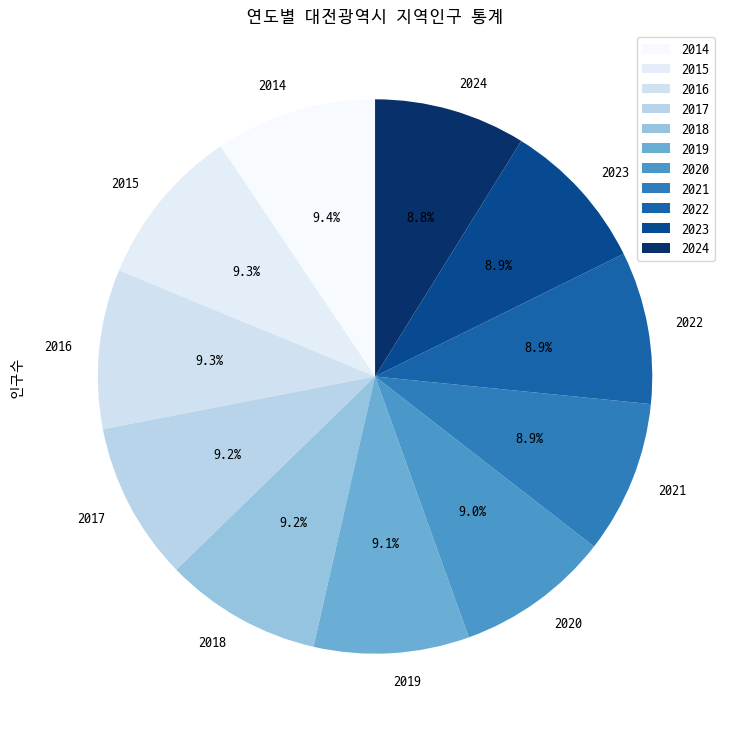

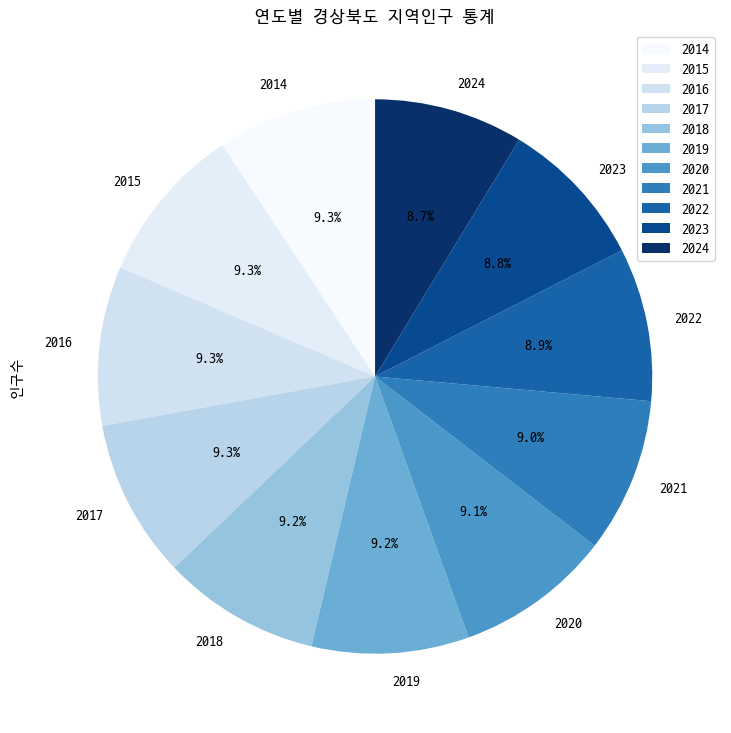

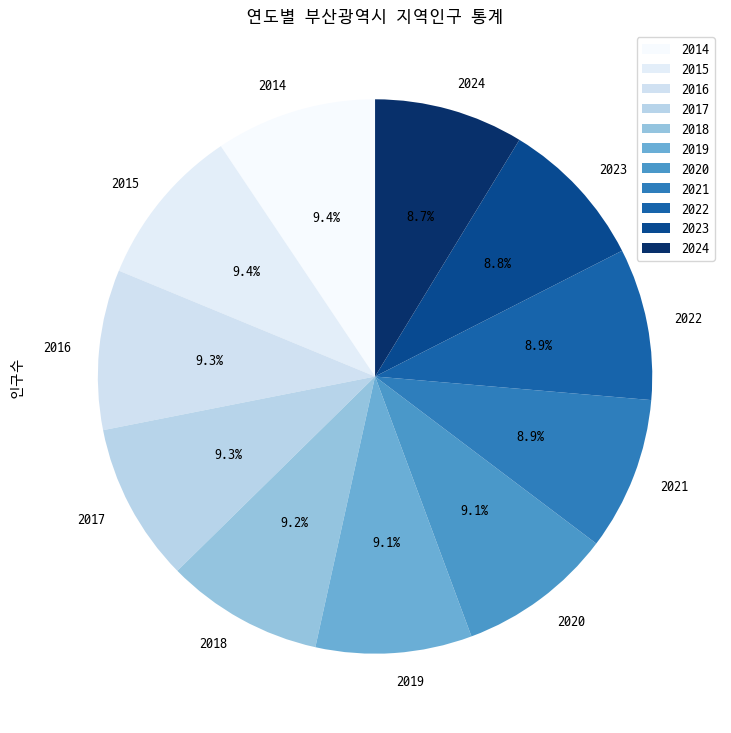

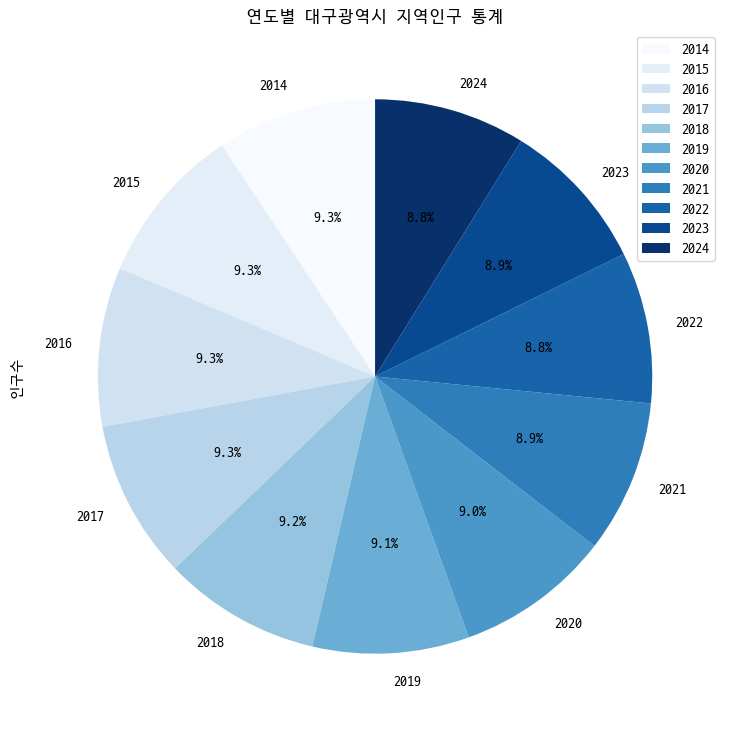

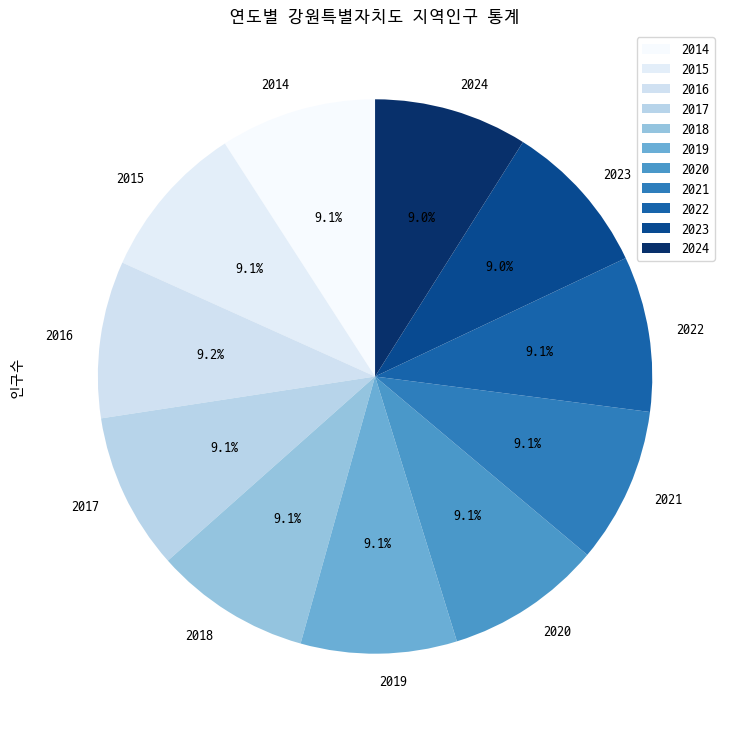

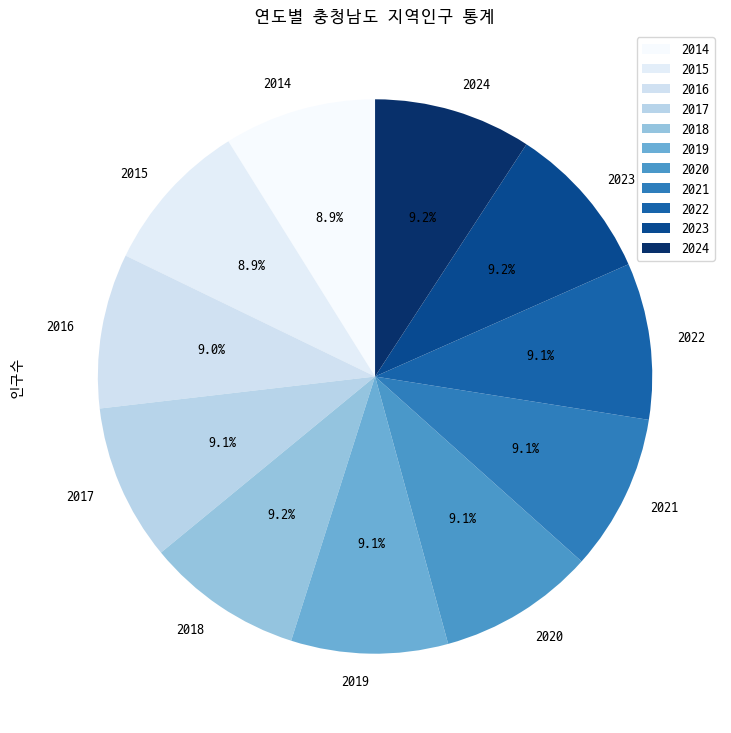

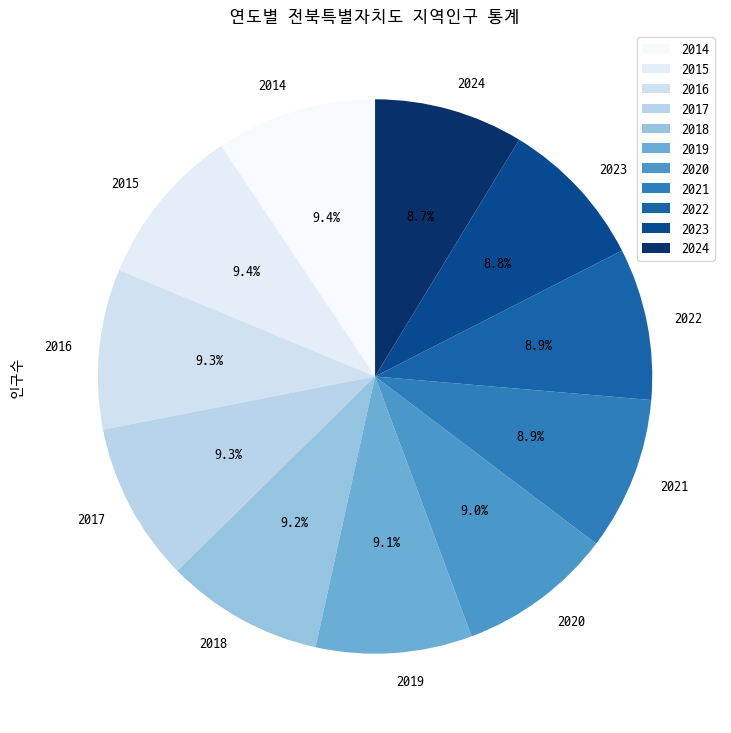

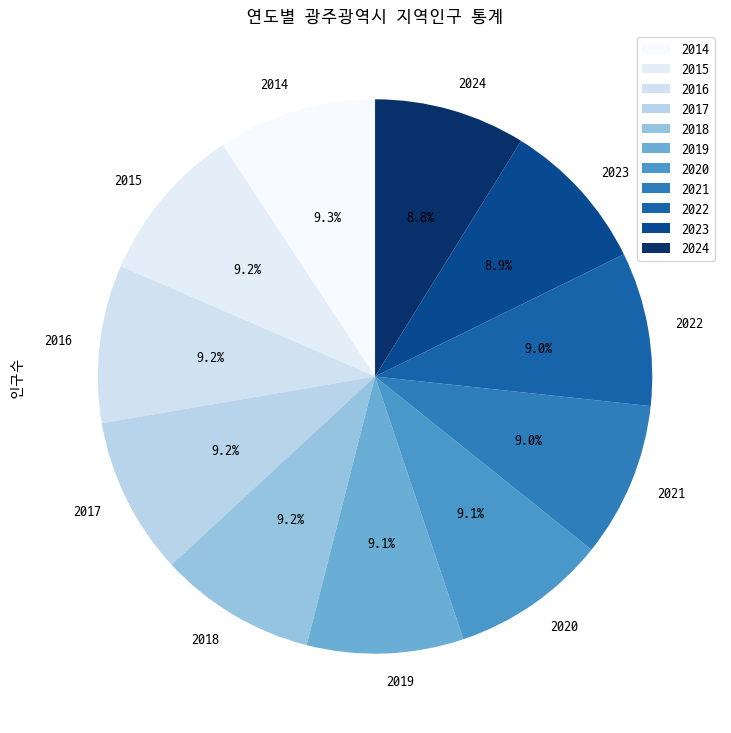

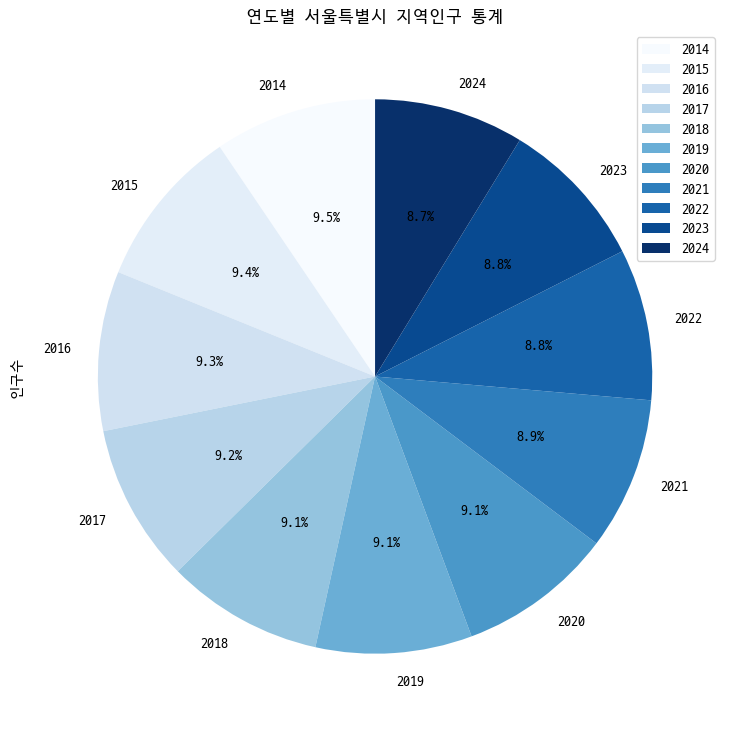

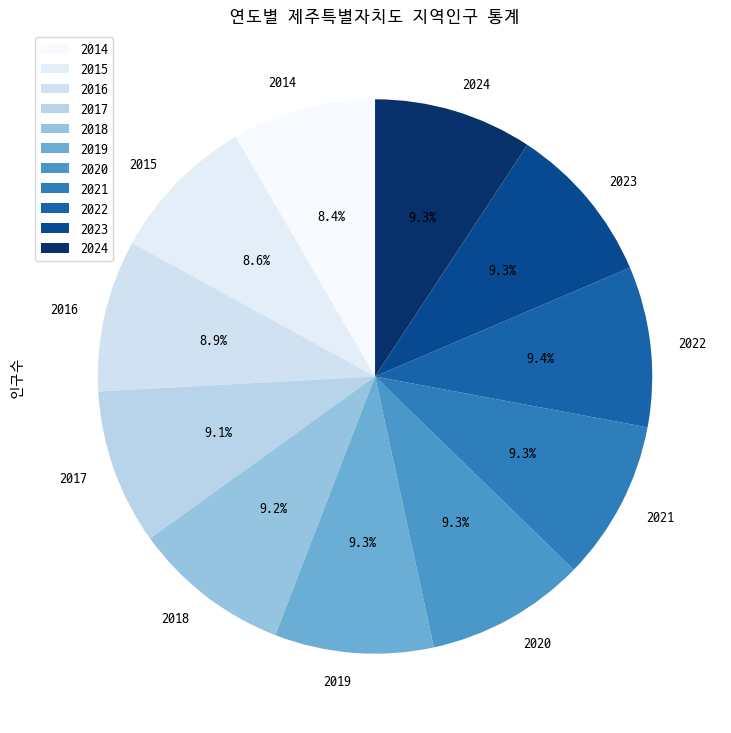

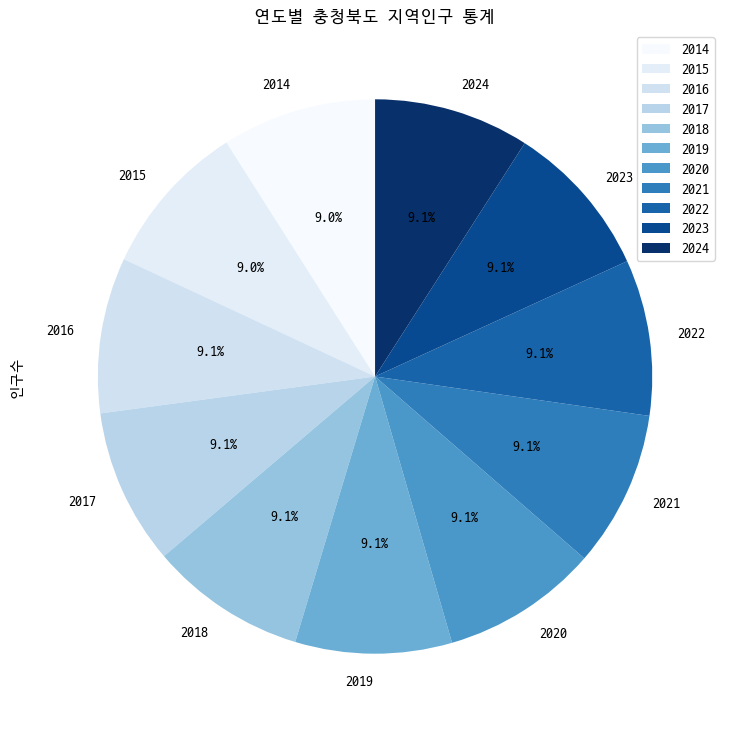

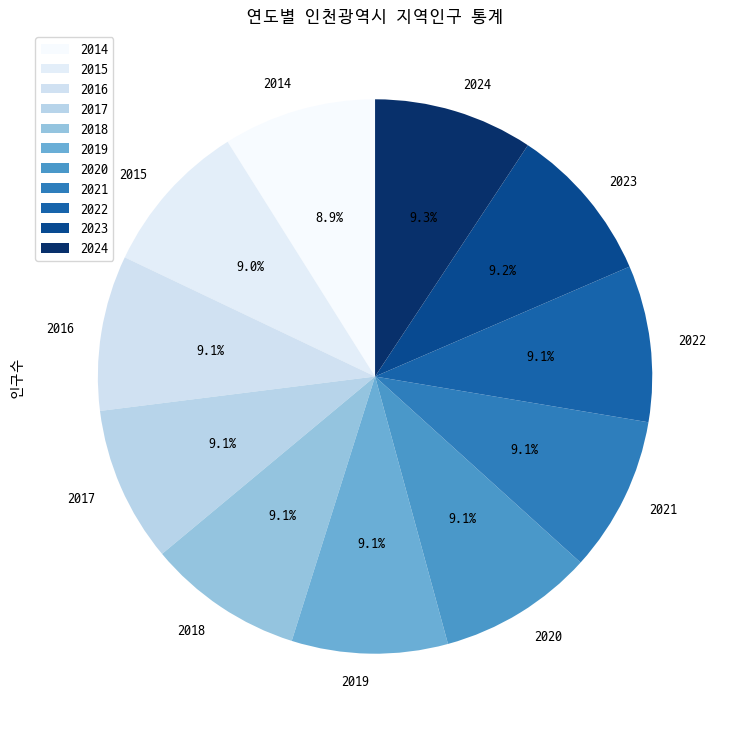

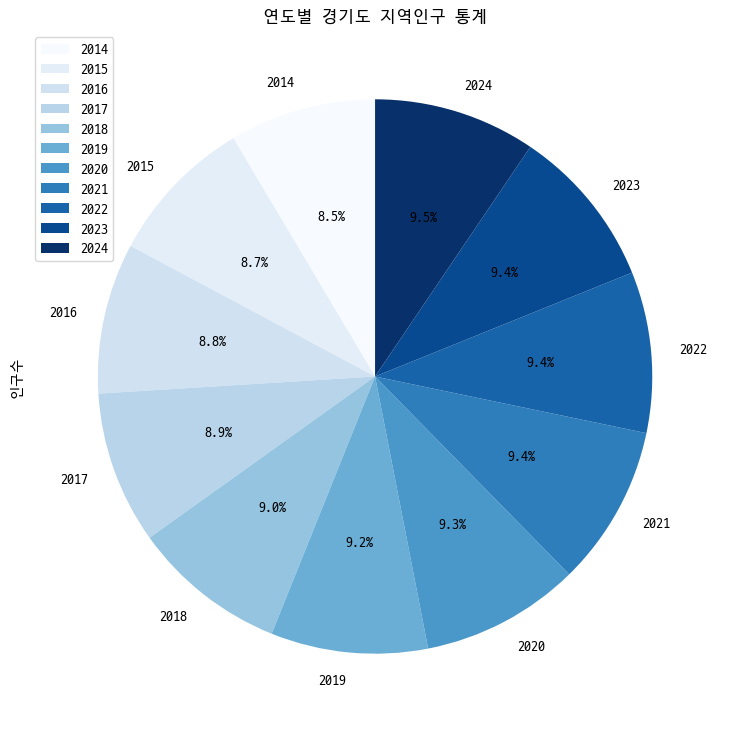

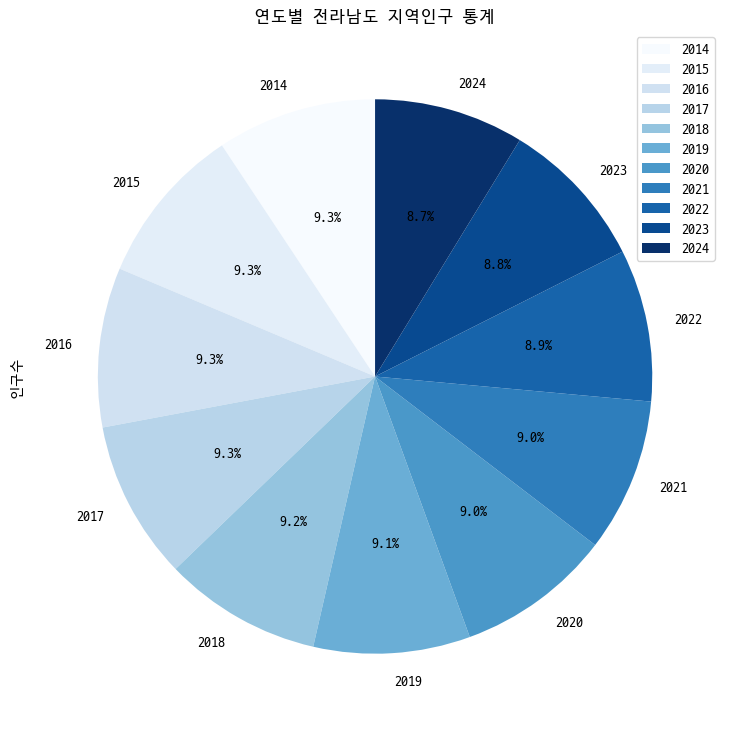

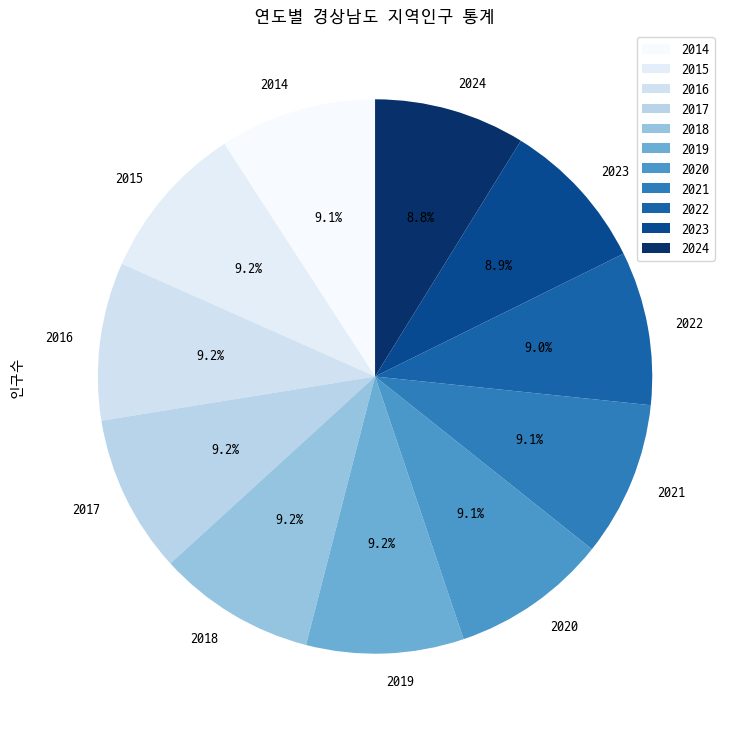

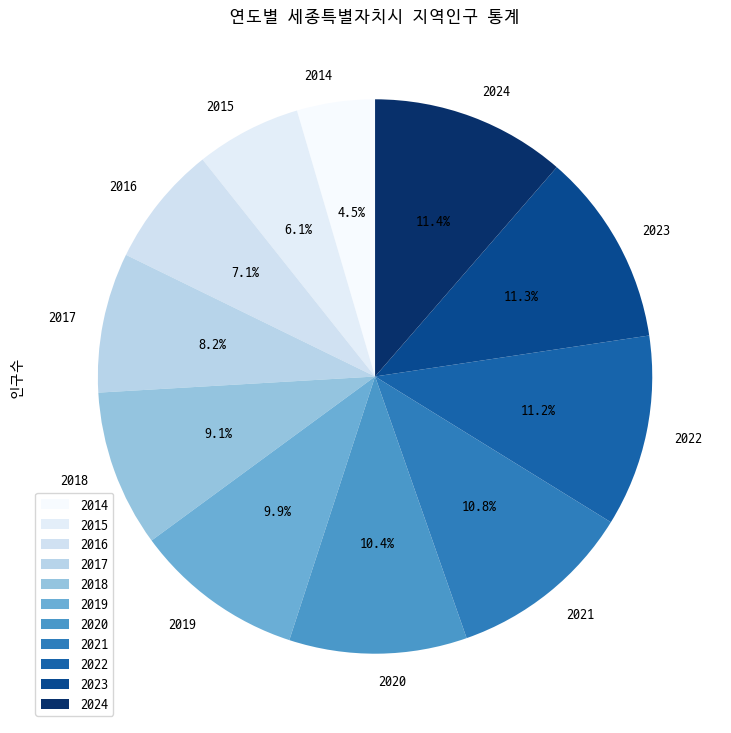

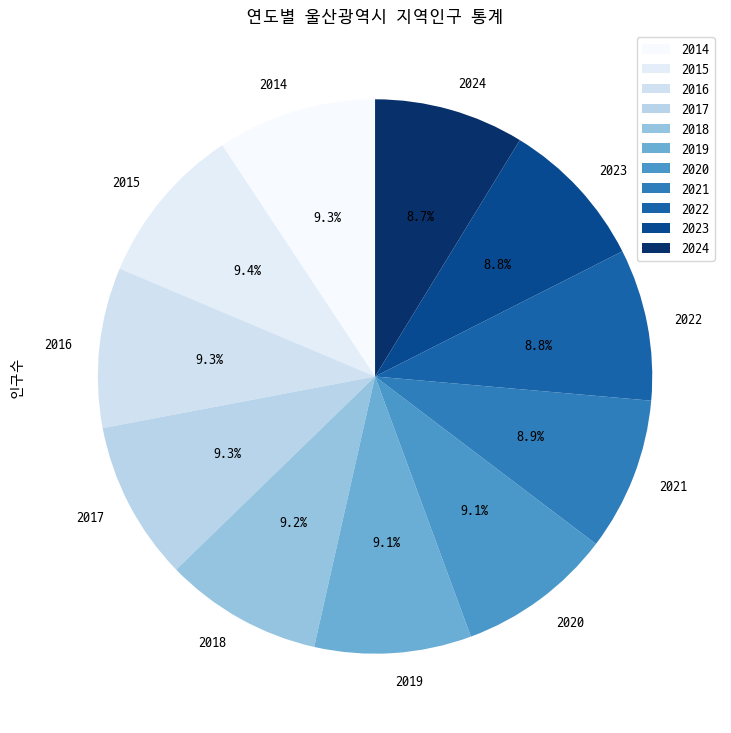

In [115]:
total_list=[]
for d in data_list:
    result = d.groupby('year')["num"].sum().reset_index(name='인구수')
    total_list.append(result)
# print(arr_data,total_list)

for i in range(len(arr_data)):
        total_list[i].plot(
        kind = 'pie',
        y = '인구수',
        labels = total_list[i]['year'],
        figsize = (9,9),
        startangle=90,
        autopct = '%.1f%%',
        title = f'연도별 {arr_data[i]} 지역인구 통계',
        cmap = matplotlib.cm.Blues)
        plt.show()